# Reto 1

## Ingeniería de características

#### Miguel Ortiz y Andrea Castiella

In [2]:
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
FullSet_3 = pd.read_csv('../Reto1-Dataset/1000_tres.csv', header=None)
FullSet_7 = pd.read_csv('../Reto1-Dataset/1000_siete.csv', header=None)

# Reescalado a [0, 1]
FullSet_3 = FullSet_3 / 255.0
FullSet_7 = FullSet_7 / 255.0

## Función extracción de características

In [53]:
def feat_extraction(data):
    num_feat = 4
    features = np.zeros([data.shape[0], num_feat])
    data = data.values.reshape([data.shape[0],28,28]) # Cada fila es una imagen, reshape a 28x28
    
    for i in range(data.shape[0]): # Por cada imagen 
        img = data[i,:,:]
        # Característica 1
        feat_1  = np.sum(img[:, :int(img.shape[1]/2)]) # Suma de los pixels la mitad izquierda de la imagen
        features[i, 0] = feat_1
        # Característica 2
        feat_2 = np.sum(img[int(img.shape[0]/2):, :]) # Suma de los pixels de la mitad inferior de la imagen
        features[i, 1] = feat_2
        # Característica 3
        feat_3 = np.sum(img[:, int(img.shape[1]/2):]) # Suma de los pixels de la mitad derecha de la imagen
        features[i, 2] = feat_3
        # Característica 4
        feat_4 = np.sum(img[:int(img.shape[0]/2), :]) # Suma de los pixels de la mitad superior de la imagen
        features[i, 3] = feat_4
        
    col_names = ['feat_1','feat_2', 'feat_3', 'feat_4']
    return pd.DataFrame(features,columns = col_names) 

In [54]:
FeatSet_3 = feat_extraction(FullSet_3)
FeatSet_7 = feat_extraction(FullSet_7)

In [55]:
FeatSet_3.head()

,feat_1,feat_2,feat_3,feat_4
0,66.839216,70.372549,72.113725,68.580392
1,45.800000,47.858824,51.960784,49.901961
2,47.196078,57.521569,55.847059,45.521569
3,38.454902,39.705882,35.541176,34.290196
4,66.349020,74.427451,82.505882,74.427451


In [56]:
FeatSet_7.head()

,feat_1,feat_2,feat_3,feat_4
0,30.623529,33.623529,41.745098,38.745098
1,34.964706,42.117647,53.929412,46.776471
2,16.870588,25.447059,42.921569,34.345098
3,45.329412,50.313725,57.729412,52.745098
4,31.996078,38.760784,54.541176,47.776471


## Función de jitter para una mejor visualización de los parámetros

In [66]:
def jitter(data, sigma=0.3):
    random_sign = (-1)**np.random.randint(1,3,*data.shape)
    return data + np.random.normal(0,sigma,*data.shape)*random_sign



In [ ]:
def feat_rescaled(features):
    return 

## Visualización del resultado

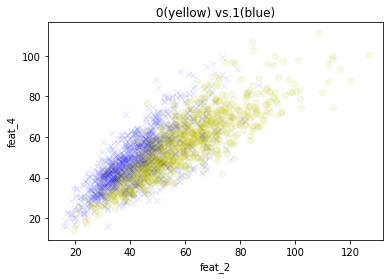

In [67]:

horizontal = 'feat_2'
vertical = 'feat_4'
alpha = 0.1 # Transparencia
sigma = 0.3 # Jitter
plt.plot(jitter(FeatSet_3[horizontal], sigma), jitter(FeatSet_3[vertical], sigma),'yo',alpha=alpha)
plt.plot(jitter(FeatSet_7[horizontal], sigma), jitter(FeatSet_7[vertical], sigma),'bx',alpha=alpha)
plt.xlabel(horizontal)
plt.ylabel(vertical)
plt.title('0(yellow) vs.1(blue)')
plt.show()